<a href="https://colab.research.google.com/github/robert-marik/myslivost/blob/main/cviceni/Newtonuv_zakon_ochlazovani_pomoci_prealokace_pole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Newtonův zákon ochlazování

**Budeme modelovat ochlazování hrníčku s kávou. Z počáteční hodnoty bude teplota klesat rychlostí, která je úměrná rozdílu teploty kávy a teploty okolí.**

Budeme postupovat po malých krůčcích. Vyjdeme z aktuální teploty, vypočteme teplotní rozdíl a pomocí něj určíme aktuální rychlost ochlazování. Zvolíme-li časový interval a v tomto intervalu budeme rychlost považovat za konstantní, můžeme odhadnout, o kolik se káva v tomto časovém intervalu ochladí a tím zjistit, jaká bude teplota v dalším časovém okamžiku. Tím dostaneme novou aktuální teplotu pro pozdější čas a postup opakujeme. 

Uvedenou myšlenku si numericky nasimulujeme.

In [ ]:
# Nainportujeme knihovny pro výpočty a kreslení
import numpy as np
import matplotlib.pyplot as plt


Následující blok nastavuje parametry výpočtu. Jak dlouhá simulace v čase nás zajímá a po jak velkých časových krocích budeme postupovat. S ohledem na tyto parametry si nachystáme česovou škálu a vyhradíme paměť pro teplotu. 

In [ ]:
tmax = 40 # Cas budeme merit od nuly, maximalni cas, jakeho chceme v simulaci 
          # doshanout bude tmax
pocet = 1001  # Pocet podintervalu, na ktery rozdelime casovy interval. 
              # Uvnitr techto podintervalu budeme rychlost povazovat za konstantu.
t = np.linspace(0,tmax,pocet)  # Prikaz vygeneruje body na casove ose
dt = t[1]-t[0]  # Delka casoveho podintervalu
T = np.zeros(pocet)  # Prikaz alokuje misto pro ukladani teploty

Následující parametry charaktrizují fyzikální podmínky simulace. Nastavují počáteční teplotu kávy, teplotu místnosti a koeficient související s tepelně izolačními vlastnostmi hrníčku. Koeficient bude jiný pro plechový hrnek, porcelánový hrnek, polystyrenový hrnek nebo termohrnek.

In [ ]:
T[0]=100        # nastaveni pocatecni teploty
T_okoli = 20    # nastaveni teploty okoli
k=.15           # nastaveni parametru hrnicku, zda v nem kava chladne rychle nebo pomalu

Následující blok postupně krůček po krůčku vezme současnou teplotu a přidá k ní pokles v následujícím časovém intervalu. Tento pokles se počítá pomocí předpokladu, že rychlost je konstantní. Je-li časový interval opravdu krátký, je tento předpoklad oprávněný a vede k realistické simulaci procesu.

In [ ]:
for i in range(len(T)-1):  # Cyklus pres vsechny teploty krome predposledni
  dT = -dt*k*(T[i]-T_okoli)  # Zmena teploty do následujícího časového okamžiku
  T[i+1] = T[i]+dT # Výpočet teploty v následujícím časovém okamžiku

Na závěr řešení získané simulací vykreslíme.

[(0.0, 100.0),
 Text(0, 0.5, 'teplota'),
 Text(0.5, 0, 'čas'),
 Text(0.5, 1.0, 'Vývoj teploty kávy v čase')]

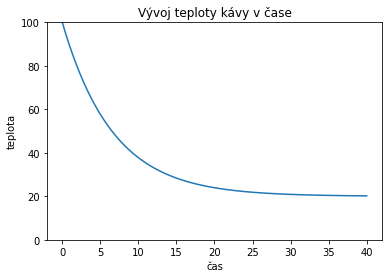

In [ ]:
fig, ax = plt.subplots()  # Založení obrázku
plt.plot(t,T)  # Vykrelsení závislosti teploty na čase
ax.set(  # Popisky os, nastavení rozsahu
    ylim=[0,max(T)],
    ylabel="teplota",
    xlabel="čas",
    title="Vývoj teploty kávy v čase"
    )